AUTHOR:         
marwa Osman: marwaosman9975@gmail.com    

👉 [LinkedIn](https://www.linkedin.com/in/marwa-osman-00190b222/)

👉 [GitHub](https://github.com/marwa9975)

# CUSTOMER CHURN PREDICTION

## PROJECT DESCRIPTION

In this project, I aim to build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. I will use a dataset from the UCI Machine Learning Repository, which contains information such as age, job, marital status, education, balance, and various other features about the customers. The goal is to develop a predictive model that can assist marketing efforts by identifying potential customers who are more likely to make a purchase

## BUSINESS UNDERSTANDING


The project is important for businesses, especially in the marketing and sales domain, as it can help in targeting potential customers more effectively. By identifying customers who are likely to make a purchase, businesses can optimize their marketing strategies, allocate resources efficiently, and ultimately increase their conversion rates and revenue.

## DATA UNDERSTANDING

The dataset i obtained from UCI Machine Learning Repository website: [Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)  
 
The dataset contains the following columns:    

``age``: Age of the customer.   
``job``: Occupation of the customer.    
``marital``: Marital status of the customer.     
``education``: Education level of the customer.  
``default``: Whether the customer has credit in default (yes/no).  
``balance``: Average yearly balance in euros.   
``housing``: Whether the customer has a housing loan (yes/no).  
``loan``: Whether the customer has a personal loan (yes/no).   
``contact``: Type of communication used to contact the customer.  
``day``: Last contact day of the month.   
``month``: Last contact month of the year.   
``duration``: Duration of the last contact in seconds.   
``campaign``: Number of contacts performed during this campaign.   
``pdays``: Number of days since the customer was last contacted.   
``previous``: Number of contacts performed before this campaign.   
``poutcome``: Outcome of the previous marketing campaign.   
``y``: Whether the customer subscribed to a term deposit (yes/no).    

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder  
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,roc_auc_score,log_loss
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [58]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
    
    def get_value_counts(self):
        value_counts = {}
        for column in self.df.columns:
            value_counts[column] = self.df[column].value_counts()
        return value_counts
    

In [59]:
# load the data
bank = pd.read_csv('bank.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [60]:
# Initialize the DataUnderstanding class
du = DataUnderstanding(bank)

In [61]:
# Get the summary statistics
du.get_summary_statistics()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [62]:
# get summary of the data
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The data contains 4521 entries and 17 columns

In [63]:
# Get data types
du.get_dtypes()

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## DATA PREPARATION

#### Check for missing values

In [64]:
# Replace 'unknown' with NaN for categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome', 'month']
bank[categorical_columns] = bank[categorical_columns].replace('unknown', pd.NA)

In [65]:
# Check for missing values
du.get_missing_values()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

#### dealing with missing values

Job has a few missing values i can drop the rows with missing values

In [66]:
# Remove rows with missing ages
bank.dropna(subset=['job'], inplace=True)

I will drop both the poutcome column and contact

In [67]:
bank = bank.drop(['poutcome', 'contact'], axis=1)

I will fill the missing values in education with mode.This will help preserve data  and it will have minimal impact on the overall distribution of data

In [68]:
bank['education'].fillna(bank['education'].mode()[0], inplace=True)

In [69]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [70]:
# get value counts
du.get_value_counts()

{'age': 34    231
 32    224
 31    198
 36    188
 33    185
      ... 
 68      2
 87      1
 81      1
 86      1
 84      1
 Name: age, Length: 67, dtype: int64,
 'job': management       969
 blue-collar      946
 technician       768
 admin.           478
 services         417
 retired          230
 self-employed    183
 entrepreneur     168
 unemployed       128
 housemaid        112
 student           84
 Name: job, dtype: int64,
 'marital': married     2767
 single      1189
 divorced     527
 Name: marital, dtype: int64,
 'education': secondary    2298
 tertiary     1342
 primary       671
 Name: education, dtype: int64,
 'default': no     4407
 yes      76
 Name: default, dtype: int64,
 'balance': 0       354
 2        24
 1        15
 4        13
 23       11
        ... 
 2558      1
 539       1
 1041      1
 464       1
 1137      1
 Name: balance, Length: 2338, dtype: int64,
 'housing': yes    2558
 no     1925
 Name: housing, dtype: int64,
 'loan': no     3793
 yes     

#### Detecting outliers and removing outliers

In [71]:
# Set the plot style to a dark theme
plt.style.use('dark_background')

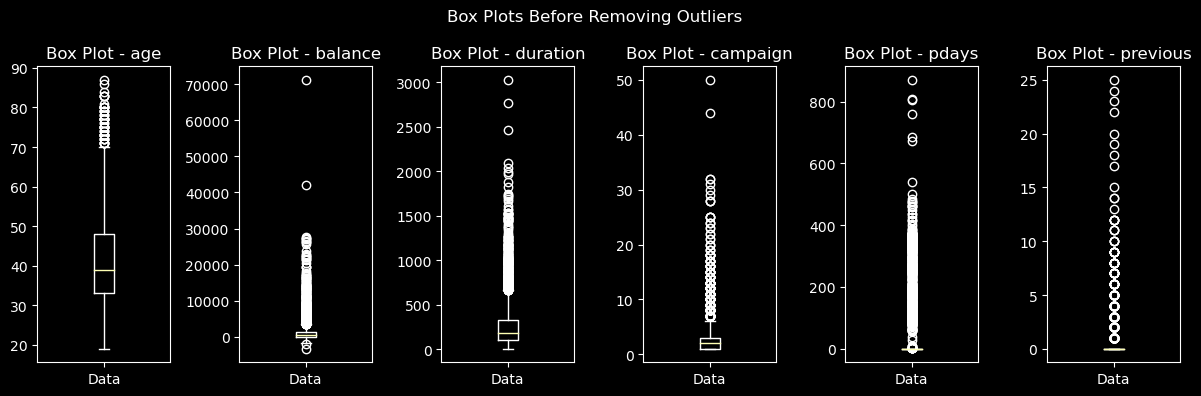

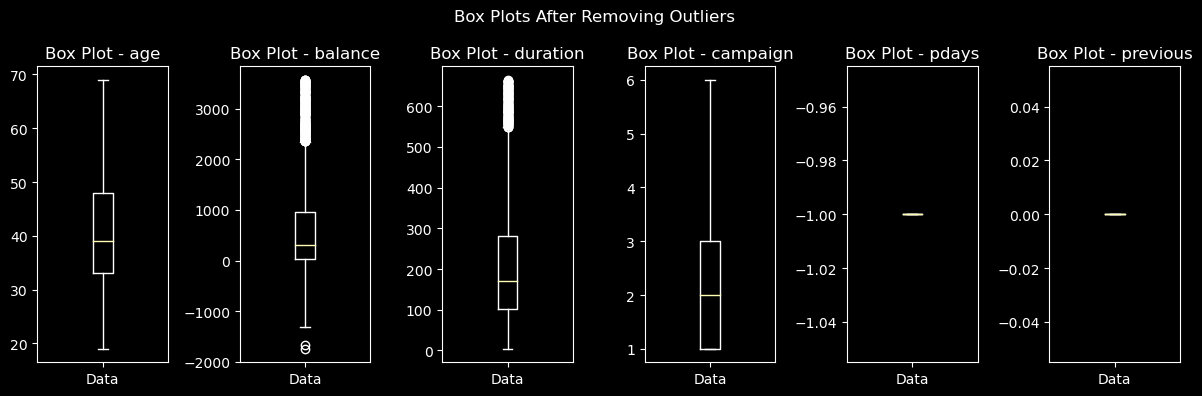

In [72]:
# plot
def plot_boxplots(data, column_names, title):
    plt.figure(figsize=(12, 4))
    for i, column in enumerate(column_names, 1):
        plt.subplot(1, len(column_names), i)
        plt.boxplot(data[column])
        plt.title(f'Box Plot - {column}')
        plt.xticks([1], ['Data'])

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Specify the numeric columns you want to check for outliers
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Plot box plots before removing outliers
plot_boxplots(bank, numeric_columns, 'Box Plots Before Removing Outliers')

def remove_outliers_iqr(df, column_names):
    outliers_removed = df.copy()
    for column in column_names:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect and remove outliers
        outliers_removed = outliers_removed[(outliers_removed[column] >= lower_bound) &
                                              (outliers_removed[column] <= upper_bound)]

    return outliers_removed

# Detect and remove outliers
data_no_outliers = remove_outliers_iqr(bank, numeric_columns)

# Plot box plots after removing outliers
plot_boxplots(data_no_outliers, numeric_columns, 'Box Plots After Removing Outliers')


## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

Univariate analysis involves examining the distribution of individual variables

##### Subscription rate

The dependent variable would typically be "y," which represents whether the customer subscribed to a term deposit. This variable indicates the binary outcome of interest: whether a customer made a specific decision or took a specific action, in this case, subscribing to a term deposit or not

In [73]:
# count of subscription rate
bank['y'].value_counts(normalize=True)

no     0.885345
yes    0.114655
Name: y, dtype: float64

The distribution of the two classes in the data set is not equal. This causes data imbalance. Data imbalance can cause a model to make false predictions, so it is important to address this issue before modeling.

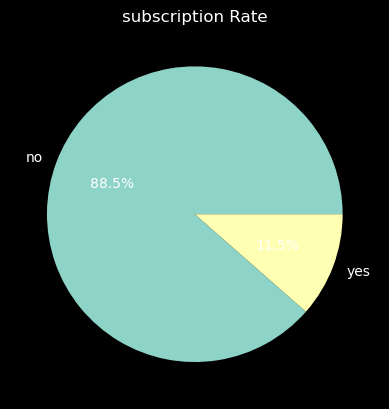

In [74]:
#plotting churn rate
def plot_churn_rate(data):
    #Create a figure
    fig, ax = plt.subplots()

    # Plot the churn rate
    ax.pie(bank['y'].value_counts(), labels=bank['y'].value_counts().index, autopct='%1.1f%%')

    # Add a title
    ax.set_title('subscription Rate')

    # Show the plot
    plt.show()
plot_churn_rate(bank['y']) 

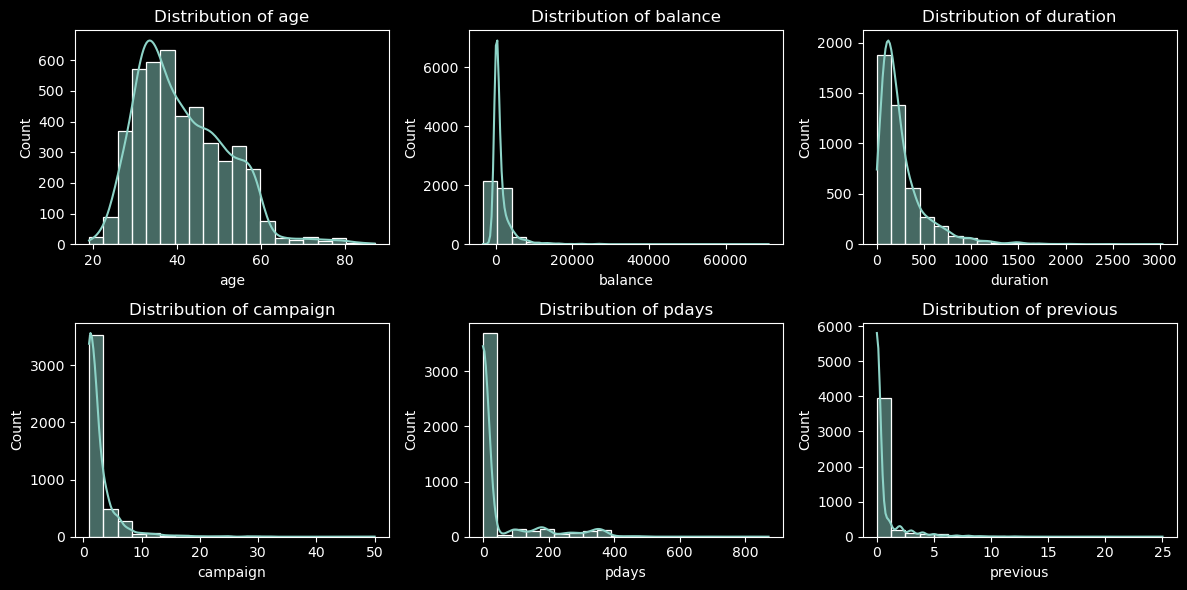

In [75]:

# Distribution of numerical variables
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(bank[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

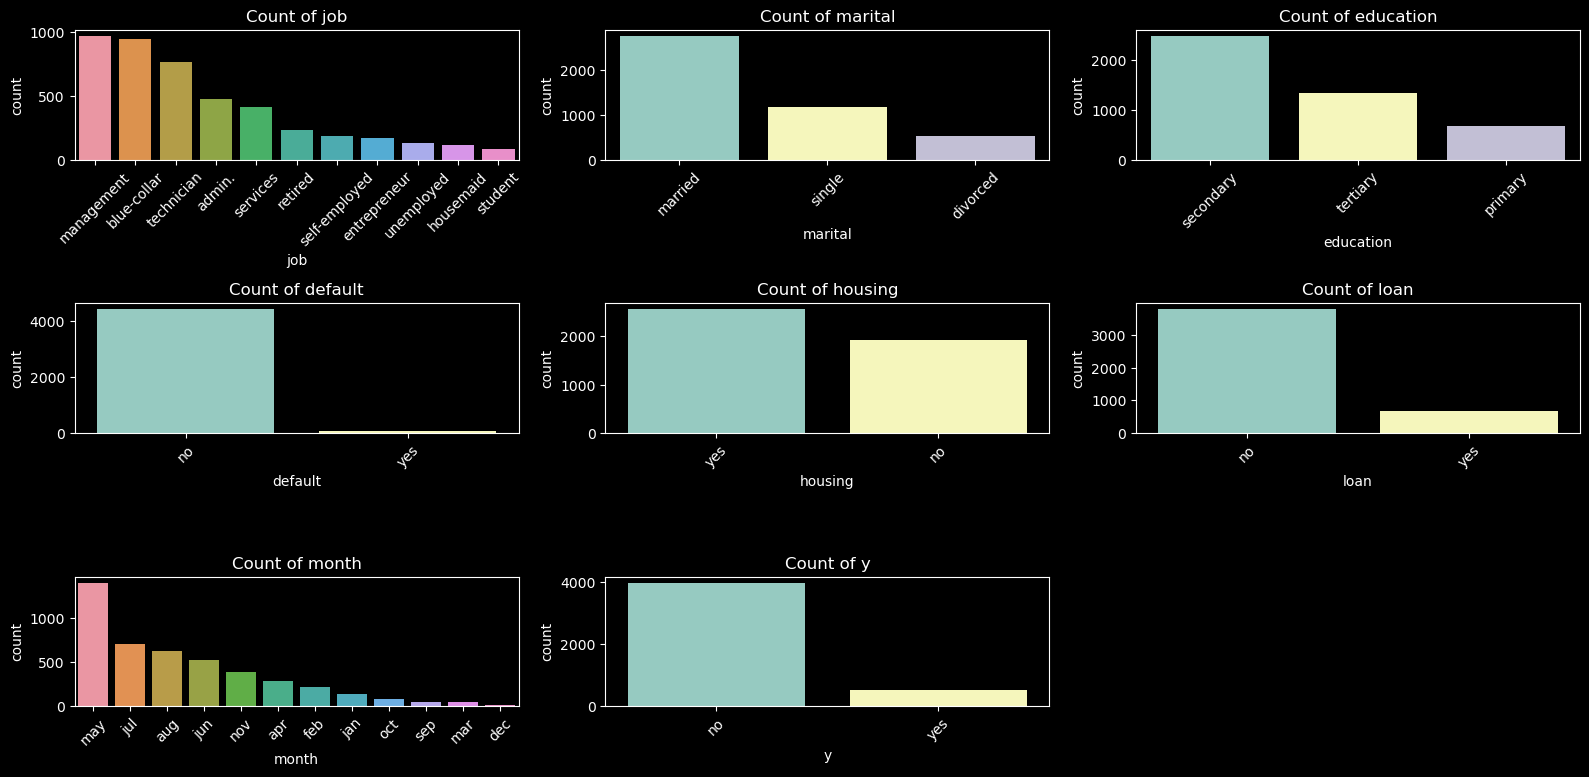

In [76]:
# Bar plots for categorical variables
plt.figure(figsize=(16, 10))  # Increase the figure size to accommodate all categorical variables
for i, column in enumerate(bank.select_dtypes(include='object').columns, 1):
    plt.subplot(4, 3, i)  # Adjust the subplot layout
    sns.countplot(data=bank, x=column, order=bank[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis

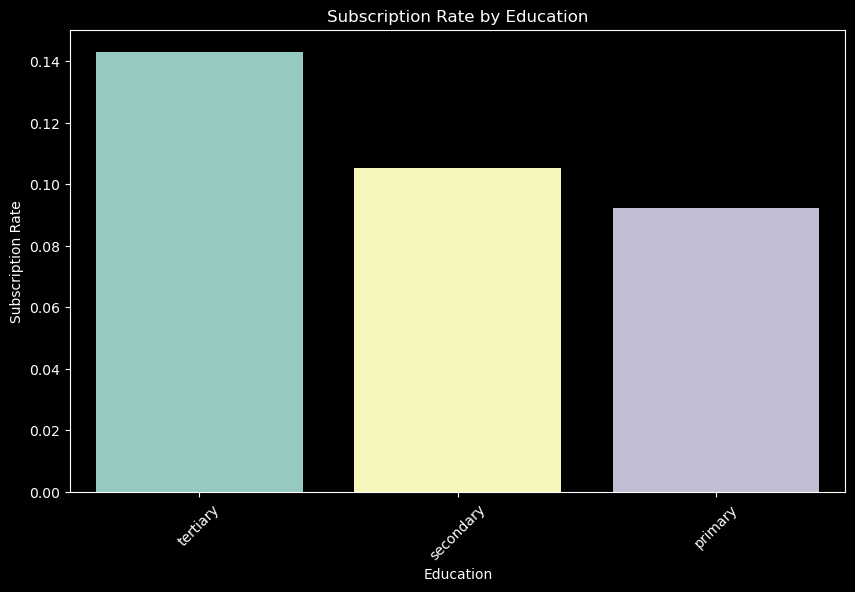

In [77]:
# Pivot table to examine the relationship between education and subscription (y)
pivot_table = bank.pivot_table(index='education', columns='y', values='age', aggfunc='count', fill_value=0)
pivot_table['subscription_rate'] = pivot_table['yes'] / (pivot_table['yes'] + pivot_table['no'])

# Bar plot to visualize subscription rate by education
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x=pivot_table.index, y='subscription_rate', order=pivot_table.sort_values(by='subscription_rate', ascending=False).index)
plt.title('Subscription Rate by Education')
plt.xlabel('Education')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()


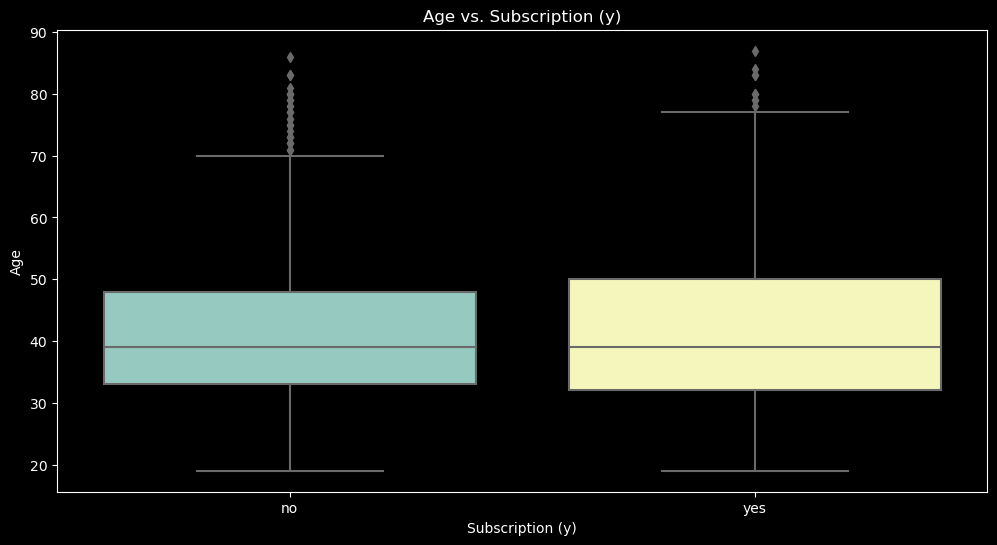

In [78]:
# Bivariate analysis with respect to the target variable ("y")
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank, x='y', y='age')
plt.title('Age vs. Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Age')
plt.show()


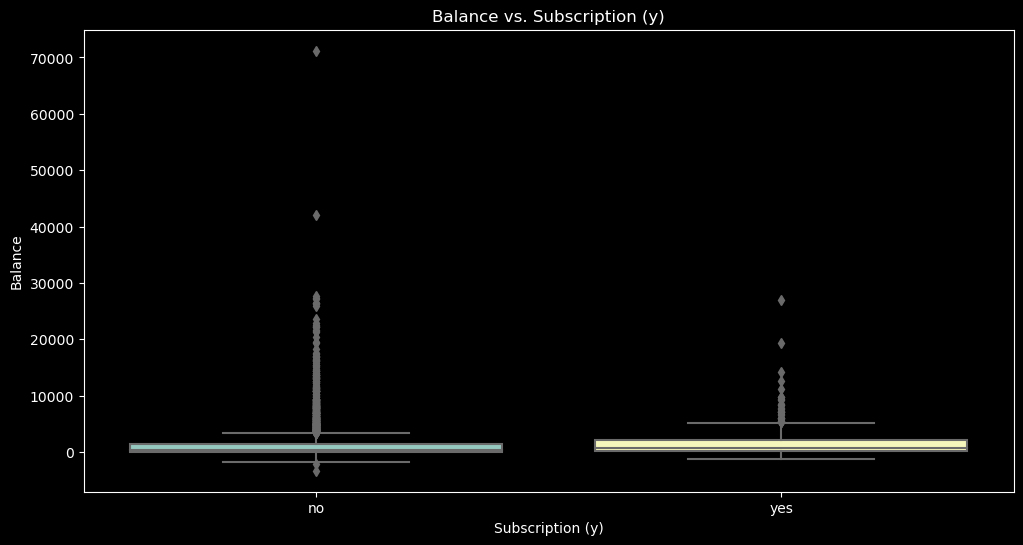

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=bank, x='y', y='balance')
plt.title('Balance vs. Subscription (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Balance')
plt.show()

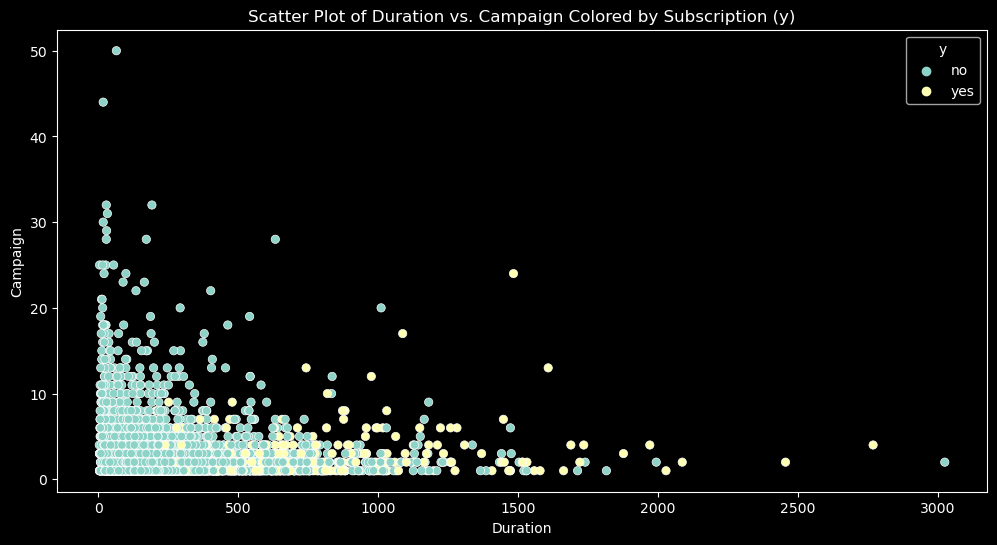

In [80]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bank, x='duration', y='campaign', hue='y')
plt.title('Scatter Plot of Duration vs. Campaign Colored by Subscription (y)')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

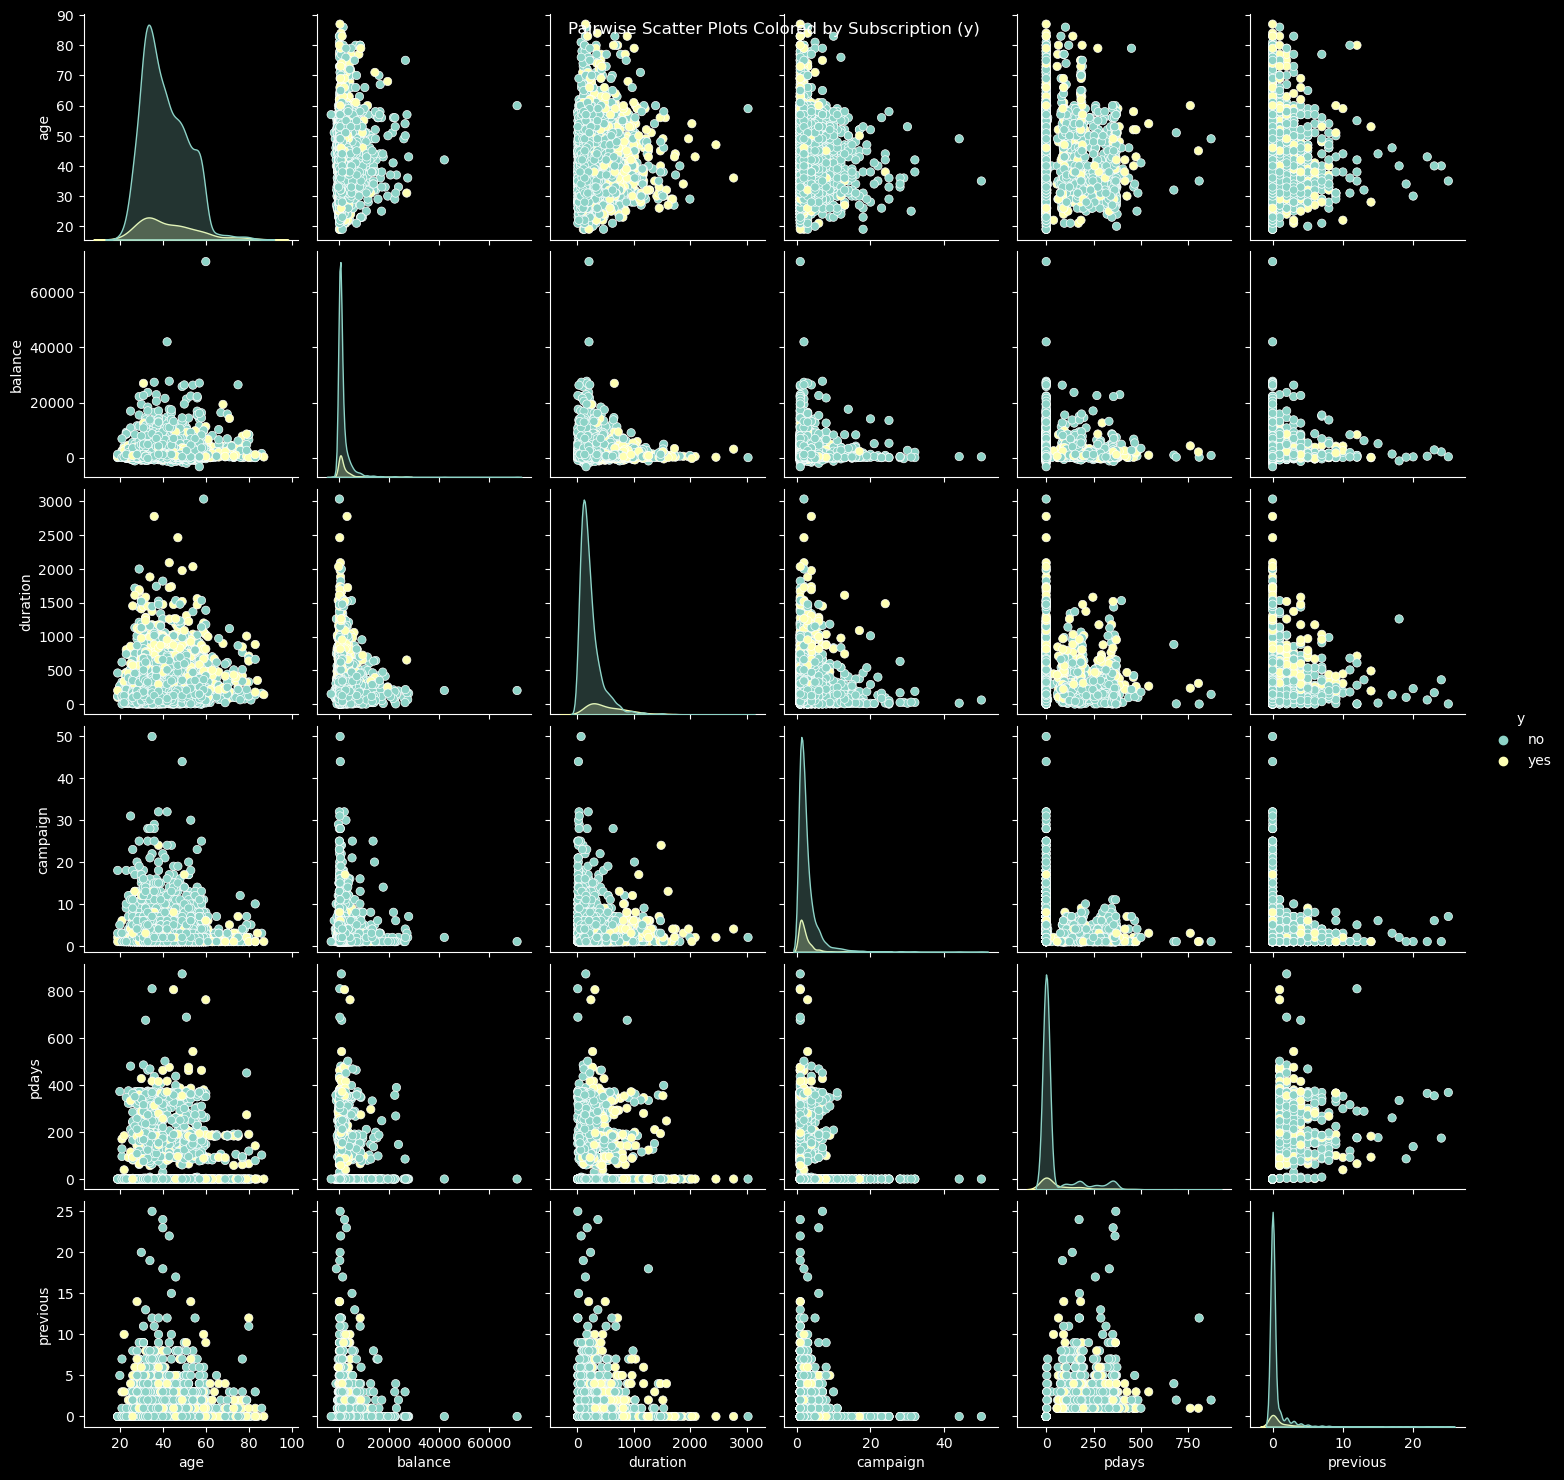

In [81]:
# Pair plots for numerical variables, color-coded by the target variable ("y")
sns.pairplot(data=bank, hue='y', vars=numeric_columns)
plt.suptitle('Pairwise Scatter Plots Colored by Subscription (y)')
plt.show()

### Multivariate Analysis

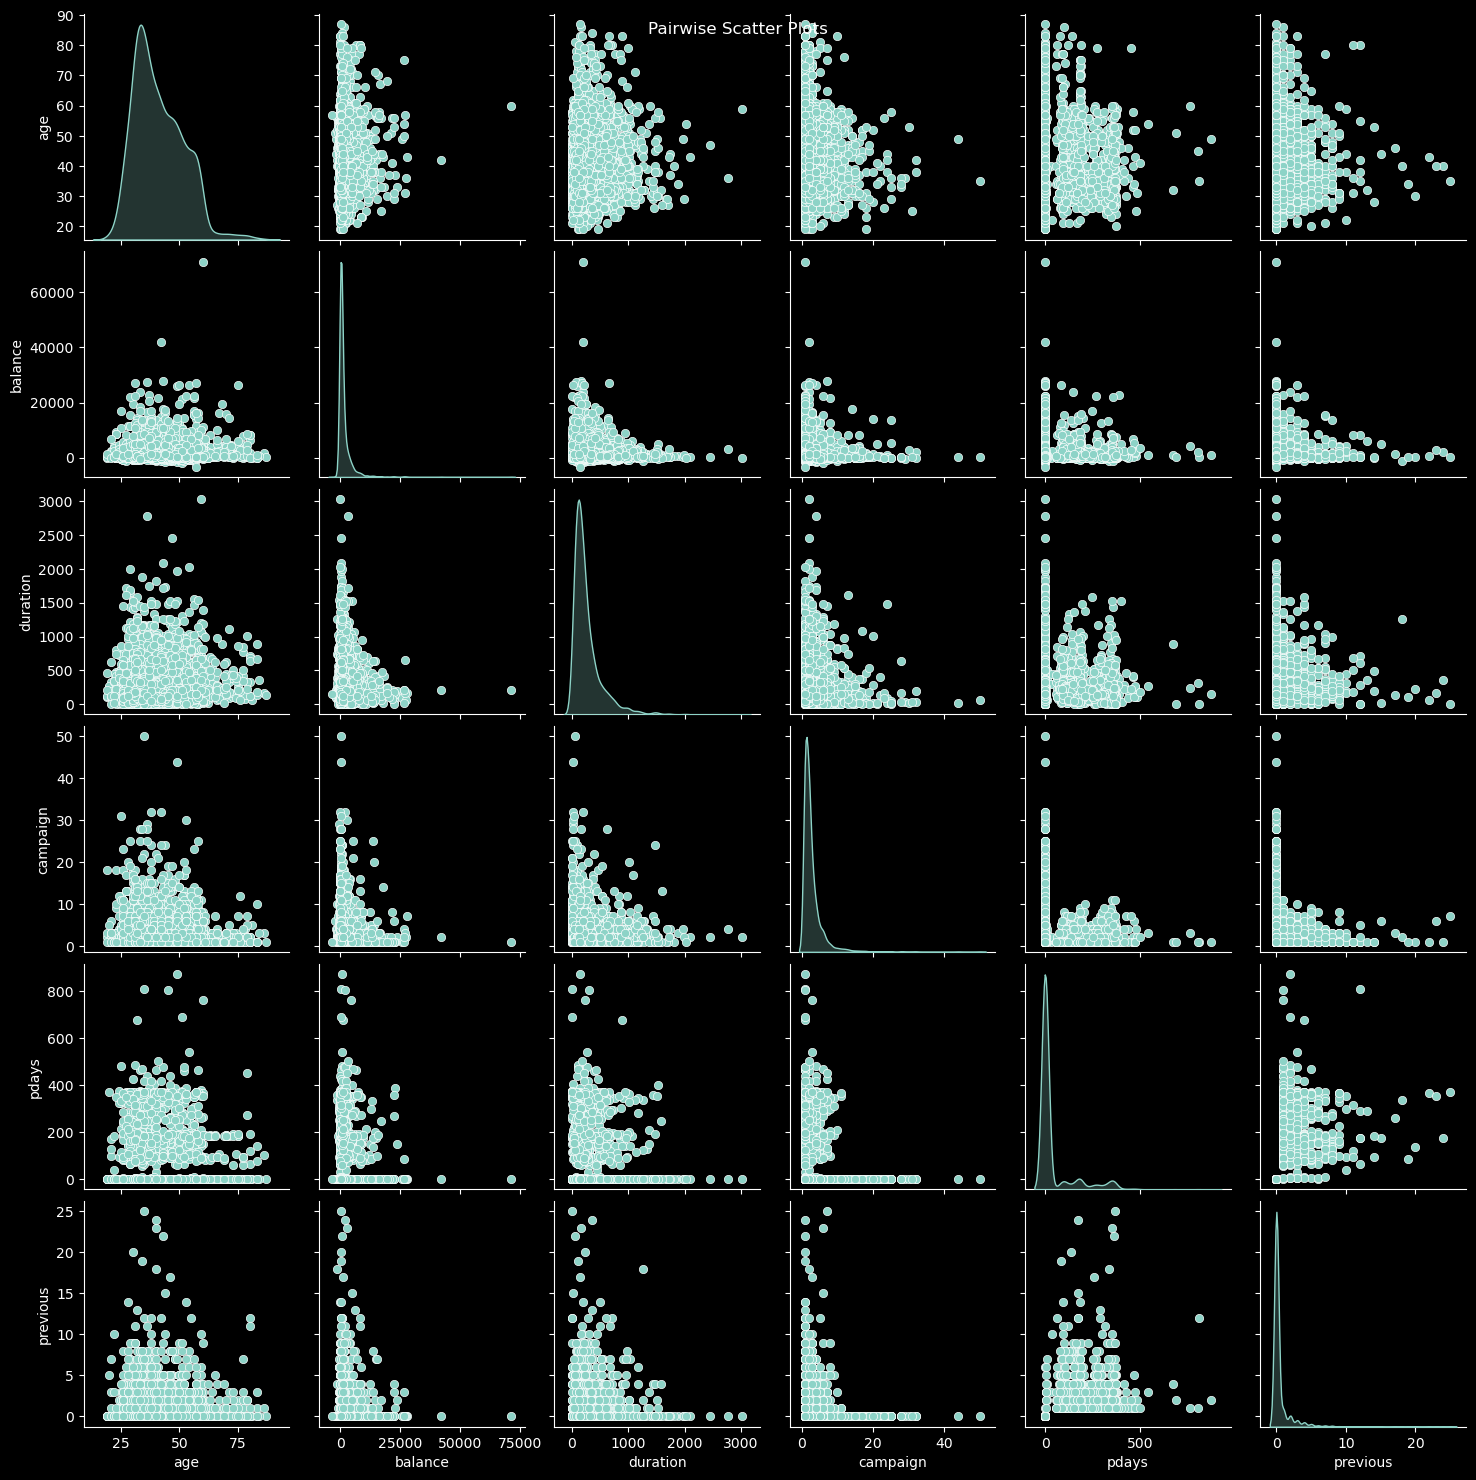

In [82]:
# Pairwise scatter plots for numerical variables
sns.pairplot(data=bank[numeric_columns], diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots')
plt.show()

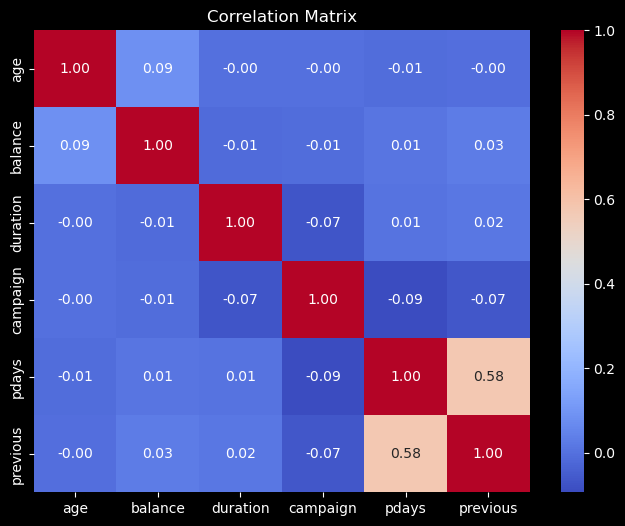

In [83]:
# Correlation matrix for numerical variables
correlation_matrix = bank[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## DATA PREPROCESSING

#### Check for multicollinearity

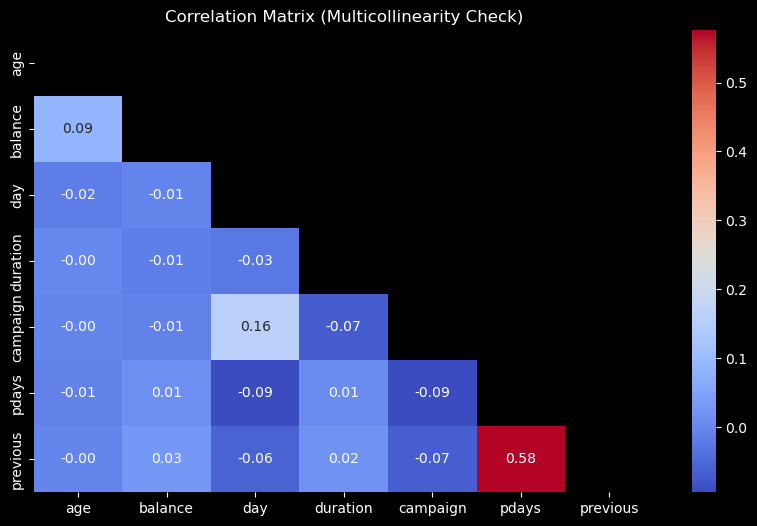

In [84]:

# Select numerical columns for correlation analysis
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Calculate the correlation matrix
correlation_matrix = bank[numerical_columns].corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Set plot title
plt.title('Correlation Matrix (Multicollinearity Check)')

# Show the plot
plt.show()


The variables are not highly correlated with each other hence no multicollinearity

### Convert  Column y to numeric(0s and 1s)

The y feature need to be binary encoded to be used in the classification problem

In [85]:
# Convert binary categorical columns to numeric (yes/no to 1/0)
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})


In [86]:
# display values in y
bank.y.unique()

array([0, 1], dtype=int64)

### Assign the variables

assigning  target variable to y for prediction and the rest of the eatures to independebt variable X

In [87]:
# Assign the data to X and y
y = bank['y']
X = bank.drop(columns=['y'], axis=1)

In [88]:
X.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0


### One-hot encode the categorical features

One-hot encoding converts categorical variables into binary vectors, where each category becomes a separate binary feature.This is necessary step in order to build a classification model

In [89]:
categorical_columns = ['job', 'marital', 'education', 'month', 'housing', 'loan', 'default']

In [90]:
# Onehotencode
ohe = OneHotEncoder(sparse=False)
X_categorical_encoded = ohe.fit_transform(X[categorical_columns])
# Retrieve feature names for the encoded columns
feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")
# Create a DataFrame for the encoded features
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=feature_names)
X_categorical_encoded_df

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_may,month_nov,month_oct,month_sep,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4479,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4481,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Scaling the numerical features

Scaling the numerical features is an essential preprocessing step before applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the dependent variable. Scaling ensures that numerical features are in the same range, making them directly comparable. This is crucial because SMOTE generates synthetic samples to balance the classes, and we want these synthetic samples to be consistent with the original data. Scaling prevents the introduction of unnecessary bias by ensuring that both original and synthetic samples exist within the same scaled range. Therefore, scaling is recommended before utilizing SMOTE to create a balanced dataset for modeling.

In [93]:
# Select the numerical columns to be scaled
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical features
X_numeric_scaled = scaler.fit_transform(X[numerical_columns])
# Create a DataFrame for the scaled features
X_numeric_scaled_df = pd.DataFrame(X_numeric_scaled, columns=numerical_columns)
X_numeric_scaled_df

,age,balance,day,duration,campaign,pdays,previous
0,-1.052386,0.120994,0.374545,-0.712253,-0.576173,-0.408378,-0.320061
1,-0.768247,1.116092,-0.597008,-0.170455,-0.576173,2.995056,2.037925
2,-0.578821,-0.023862,0.010213,-0.304944,-0.576173,2.904965,0.269435
3,-1.052386,0.017904,-1.568561,-0.251149,0.386430,-0.408378,-0.320061
4,1.694293,-0.471358,-1.325673,-0.147400,-0.576173,-0.408378,-0.320061
...,...,...,...,...,...,...,...
4478,-0.768247,-0.581741,1.710431,0.248382,0.707298,-0.408378,-0.320061
4479,1.504867,-1.569546,-0.839896,-0.427905,-0.576173,-0.408378,-0.320061
4480,1.504867,-0.373572,0.374545,-0.435590,2.632504,-0.408378,-0.320061
4481,-1.241812,-0.094467,-1.204229,-0.520126,0.386430,1.713763,1.448429


In [94]:
# combine the scaled columns and onehotencoded columns
X_final = pd.concat([X_numeric_scaled_df, X_categorical_encoded_df, ], axis=1)
X_final

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes
0,-1.052386,0.120994,0.374545,-0.712253,-0.576173,-0.408378,-0.320061,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-0.768247,1.116092,-0.597008,-0.170455,-0.576173,2.995056,2.037925,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.578821,-0.023862,0.010213,-0.304944,-0.576173,2.904965,0.269435,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,-1.052386,0.017904,-1.568561,-0.251149,0.386430,-0.408378,-0.320061,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.694293,-0.471358,-1.325673,-0.147400,-0.576173,-0.408378,-0.320061,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,-0.768247,-0.581741,1.710431,0.248382,0.707298,-0.408378,-0.320061,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4479,1.504867,-1.569546,-0.839896,-0.427905,-0.576173,-0.408378,-0.320061,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4480,1.504867,-0.373572,0.374545,-0.435590,2.632504,-0.408378,-0.320061,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4481,-1.241812,-0.094467,-1.204229,-0.520126,0.386430,1.713763,1.448429,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Train-Test Split  
Split the dataset into training and testing sets to evaluate model performance.This will help in  preventing overfitting, tuning hyperparameters, refining features, and avoiding data leakage.It also helps to  ensure that the models generalize well to new, unseen data and can make accurate predictions in real-world scenarios.

I will split the data in 80% training and 20% testing data

In [95]:
# Perform train test split using sci kit learn train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_final, y, test_size =0.2, random_state=123)

### SMOTE

Synthetic Minority Over-sampling Technique is used to handle imbalanced distribution of the target variable

In [96]:
y.value_counts()

0    3969
1     514
Name: y, dtype: int64

I will use smote to resolve the imbalance in the target variable above where 1 has very few samples compared to 0.

In [97]:
# instantiate SMOTE 
sm = SMOTE(k_neighbors=5, random_state=123)
# fit sm on the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
# print training data set before over sampling
print('Before resampling, the shape of X_train: {}'.format(X_train.shape))
print('Before resampling, the shape of y_train: {}'.format(y_train.shape)) 
# print training data set after over sampling
print('After resampling, the shape of X_train_resampled: {}'.format(X_train_resampled.shape))
print('After resampling, the shape of y_train_resampled: {}'.format(y_train_resampled.shape))
y_train_resampled.value_counts()

Before resampling, the shape of X_train: (3586, 42)
Before resampling, the shape of y_train: (3586,)
After resampling, the shape of X_train_resampled: (6314, 42)
After resampling, the shape of y_train_resampled: (6314,)


1    3157
0    3157
Name: y, dtype: int64

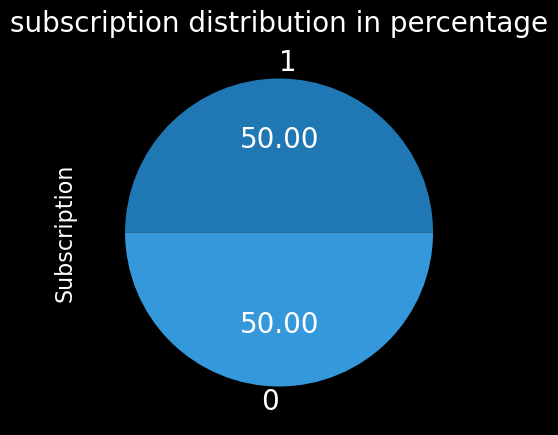

In [98]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))
#plot pie chart
y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['#1f77b4', '#3498db'], ax=ax)
# plot labels
ax.set_ylabel('Subscription', fontsize=16)
ax.set_title('subscription distribution in percentage', fontsize=20);

The training data is balanced

## MODELING

### Baseline Model - Decision Tree Classifier

A Decision Tree Classifier is a supervised machine learning algorithm used for both classification and regression tasks. It is a type of predictive modeling tool that is widely used in various fields, including data mining, finance, and healthcare, due to its simplicity and interpretability. Decision Trees are especially valuable when you need to make decisions based on data and want to understand the reasoning behind those decisions            
The Decision Tree Classifier was selected for its interpretability, ability to handle mixed data types, and capacity to capture complex relationships in customer data. It not only predicts customer purchases accurately but also provides valuable insights for guiding marketing strategies

In [99]:
# Convert feature names to strings
X_train_resampled.columns = [str(col) for col in X_train_resampled.columns]
X_test.columns = [str(col) for col in X_test.columns]

# Instantiate the model
dt_classifier = DecisionTreeClassifier(random_state=123)

# fit the model on the training data
dt_classifier.fit(X_train_resampled, y_train_resampled) 

# predict on the test data
y_test_pred_dt = dt_classifier.predict(X_test)

# predict on the training data 
y_train_pred_dt = dt_classifier.predict(X_train_resampled)

#### Most Important Features

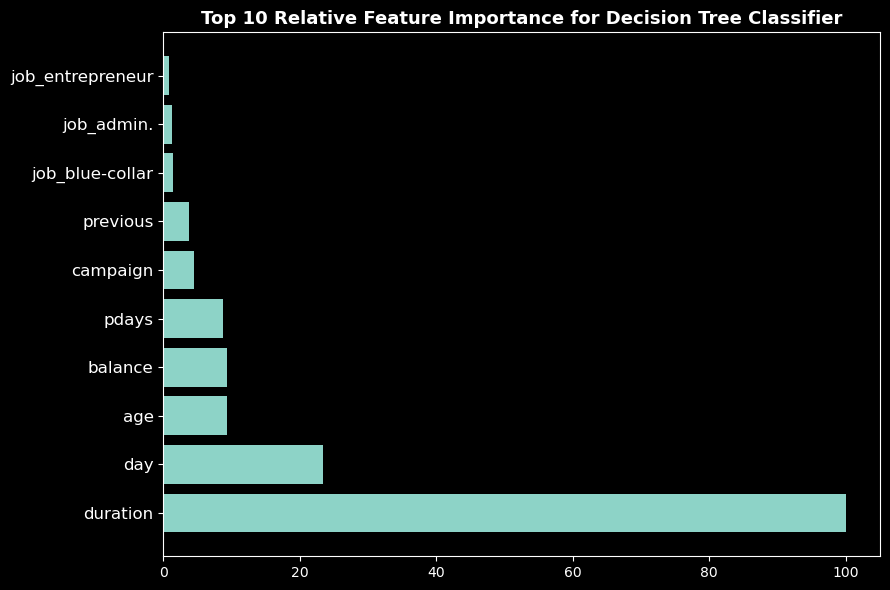

In [100]:
# function to plot
def plot_top_feature_importance_tree(feature_importance, feature_names, top_n=10, model_name=None):
    # Sort feature importances and select the top N
    sorted_idx = np.argsort(feature_importance)[::-1][:top_n]
    pos = np.arange(sorted_idx.shape[0]) + 0.5

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(9, 6))

    # Create a horizontal bar chart
    ax.barh(pos, feature_importance[sorted_idx], align='center')
    ax.set_title(f"Top {top_n} Relative Feature Importance for {model_name}", fontsize=13, fontweight='bold')
    ax.set_yticks(pos)
    ax.set_yticklabels(np.array(feature_names)[sorted_idx], fontsize=12)

    # Adjust layout and display the chart
    plt.tight_layout()
    plt.show()

# Calculate the feature importances
feature_importance_tree = dt_classifier.feature_importances_

# Select top 10 features
top_n = 10  # Change this number to select a different number of top features
top_feature_importance_tree = 100.0 * (feature_importance_tree / feature_importance_tree.max())[:top_n]

# Get the names of the features
feature_names_tree = X_train_resampled.columns.tolist()

# Plot the top feature importance
plot_top_feature_importance_tree(top_feature_importance_tree, feature_names_tree, top_n=top_n, model_name='Decision Tree Classifier')


* Duration Matters Most: The most crucial factor influencing customer subscriptions is the "duration" of interactions with marketing campaigns. Longer conversations or engagements tend to lead to higher subscription rates.
* Timing is Key: The day of the month, represented as "day" in the dataset, also significantly impacts subscription outcomes. It suggests that choosing the right timing for marketing efforts can be instrumental in boosting subscriptions.
* Age's Role: While "age" is an important variable, it appears to have a relatively less immediate impact compared to "duration" and "day." Age likely plays a more indirect role in influencing subscription decisions.    

These insights can guide marketing strategies to prioritize engaging content and strategic timing for campaigns, ultimately enhancing subscription rates

### Baseline Model Evaluation

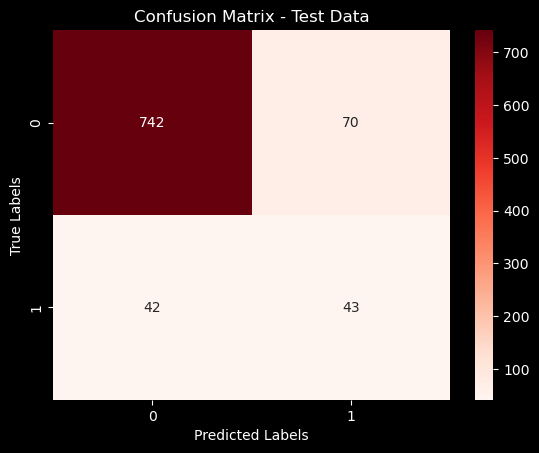

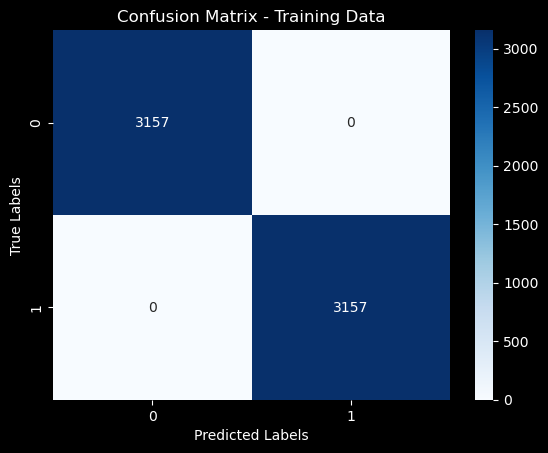

Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Test Data:
Accuracy: 0.875139353400223
Precision: 0.3805309734513274
Recall: 0.5058823529411764
F1-score: 0.43434343434343436


In [103]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict the labels for the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the evaluation metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)

    # Calculate the evaluation metrics for test data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)

    # Plot the confusion matrix for test data
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Plot the confusion matrix for training data
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Print the evaluation metrics for training data
    print("Training Data:")
    print("Accuracy:", train_accuracy)
    print("Precision:", train_precision)
    print("Recall:", train_recall)
    print("F1-score:", train_f1)

    # Print the evaluation metrics for test data
    print("\nTest Data:")
    print("Accuracy:", test_accuracy)
    print("Precision:", test_precision)
    print("Recall:", test_recall)
    print("F1-score:", test_f1)
evaluate_model(dt_classifier, X_train_resampled, y_train_resampled, X_test, y_test)

The model achieves perfect performance on the training data, possibly indicating overfitting. On the test data, it demonstrates good accuracy but lower precision, recall, and F1-score, suggesting the need for refinement and tuning to strike a better balance between precision and recall

### Second Model - Hyperparameter tuning of Decision Tree Classifier

The Parameters of the decision tree can be tuned for the model's better performance in predicting the target class